# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | peace river
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | yunfu
Processing Record 8 of Set 1 | invercargill
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | preobrazheniye
Processing Record 12 of Set 1 | odda
Processing Record 13 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | abyek
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | badger
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | whangarei
Proces

Processing Record 39 of Set 4 | aitape
Processing Record 40 of Set 4 | salalah
Processing Record 41 of Set 4 | tot'ma
Processing Record 42 of Set 4 | richmond
Processing Record 43 of Set 4 | iskateley
Processing Record 44 of Set 4 | kainantu
Processing Record 45 of Set 4 | ushuaia
Processing Record 46 of Set 4 | veraval
Processing Record 47 of Set 4 | moapa valley
Processing Record 48 of Set 4 | tidjikja
Processing Record 49 of Set 4 | lubango
Processing Record 0 of Set 5 | kourou
Processing Record 1 of Set 5 | ibiza
Processing Record 2 of Set 5 | mil'kovo
Processing Record 3 of Set 5 | puerto francisco de orellana
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | colonia menno
Processing Record 7 of Set 5 | limulunga
Processing Record 8 of Set 5 | aljezur
Processing Record 9 of Set 5 | puerto lempira
Processing Record 10 of Set 5 | chegdomyn
Processing Record 11 of Set 5 | fisterra
Processing Record 12 of Set 5 | lagoa
Proce

Processing Record 33 of Set 8 | bakchar
Processing Record 34 of Set 8 | happy valley-goose bay
Processing Record 35 of Set 8 | peqin
Processing Record 36 of Set 8 | kigali
Processing Record 37 of Set 8 | irymple
Processing Record 38 of Set 8 | svyetlahorsk
Processing Record 39 of Set 8 | mayfield
Processing Record 40 of Set 8 | gereida
Processing Record 41 of Set 8 | cambria
Processing Record 42 of Set 8 | south hedland
Processing Record 43 of Set 8 | parry sound
Processing Record 44 of Set 8 | woodland park
Processing Record 45 of Set 8 | kerikeri
Processing Record 46 of Set 8 | staraya stanitsa
Processing Record 47 of Set 8 | san antonio oeste
Processing Record 48 of Set 8 | shitanjing
Processing Record 49 of Set 8 | la junta
Processing Record 0 of Set 9 | el bagre
Processing Record 1 of Set 9 | rio grande
Processing Record 2 of Set 9 | kavaratti
Processing Record 3 of Set 9 | gadani
Processing Record 4 of Set 9 | valparaiso
Processing Record 5 of Set 9 | sao joao da barra
Processing

Processing Record 29 of Set 12 | chernyshevskiy
Processing Record 30 of Set 12 | felixstowe
Processing Record 31 of Set 12 | shimoda
Processing Record 32 of Set 12 | fort mcmurray
Processing Record 33 of Set 12 | nadym
Processing Record 34 of Set 12 | port saint john's
Processing Record 35 of Set 12 | cabo san lucas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-14.17,100,100,2.26,RU,1701735474
1,vadso,70.0744,29.7487,28.56,64,75,10.36,NO,1701735457
2,adamstown,-25.0660,-130.1015,73.20,76,91,11.65,PN,1701735423
3,blackmans bay,-43.0167,147.3167,72.52,58,95,3.00,AU,1701735428
4,peace river,56.2501,-117.2860,30.51,86,75,4.61,CA,1701735487


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-14.17,100,100,2.26,RU,1701735474
1,vadso,70.0744,29.7487,28.56,64,75,10.36,NO,1701735457
2,adamstown,-25.0660,-130.1015,73.20,76,91,11.65,PN,1701735423
3,blackmans bay,-43.0167,147.3167,72.52,58,95,3.00,AU,1701735428
4,peace river,56.2501,-117.2860,30.51,86,75,4.61,CA,1701735487


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

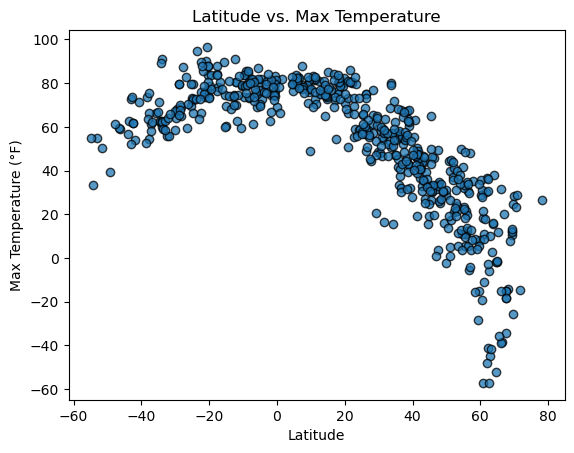

In [22]:
# Build scatter plot for latitude vs. temperature
# Scatter plot
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.title('Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')

# Display the plot
plt.show()

#### Latitude Vs. Humidity

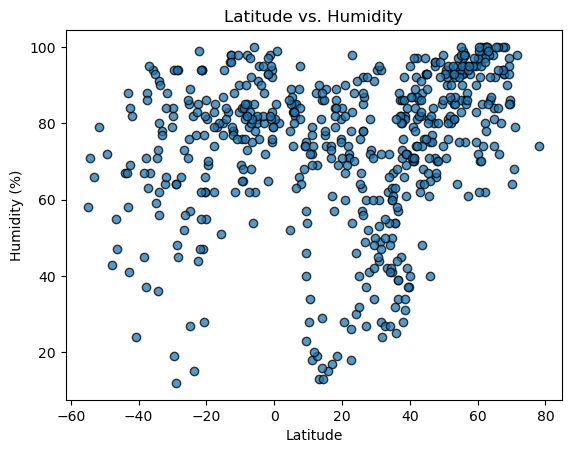

In [23]:
# Build the scatter plots for latitude vs. humidity
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Display the plot
plt.show()

#### Latitude Vs. Cloudiness

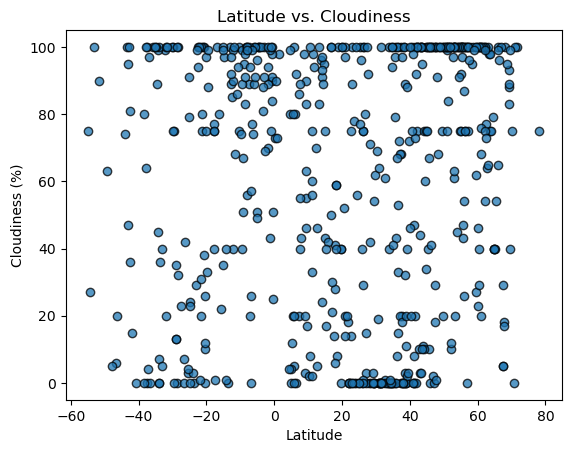

In [24]:
# Build the scatter plots for latitude vs. cloudiness
# Scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Display the plot
plt.show()

#### Latitude vs. Wind Speed Plot

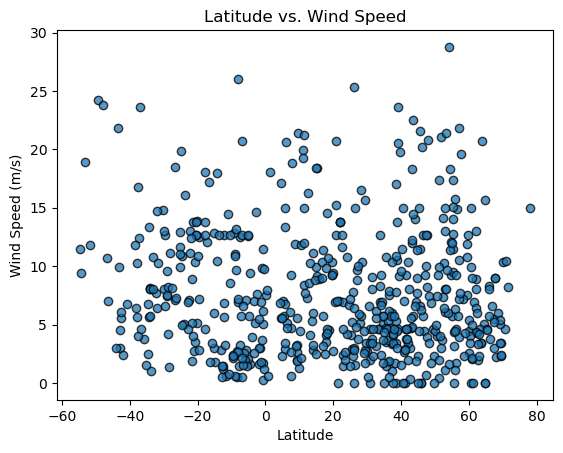

In [25]:
# Build the scatter plots for latitude vs. wind speed
# Scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Set plot labels and title
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Display the plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()  

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-14.17,100,100,2.26,RU,1701735474
1,vadso,70.0744,29.7487,28.56,64,75,10.36,NO,1701735457
4,peace river,56.2501,-117.2860,30.51,86,75,4.61,CA,1701735487
6,yunfu,22.9306,112.0373,59.13,83,89,2.42,CN,1701735668
10,preobrazheniye,42.9019,133.9064,33.12,64,3,4.70,RU,1701735463


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,adamstown,-25.0660,-130.1015,73.20,76,91,11.65,PN,1701735423
3,blackmans bay,-43.0167,147.3167,72.52,58,95,3.00,AU,1701735428
5,port-aux-francais,-49.3500,70.2167,39.16,72,63,24.20,TF,1701735418
7,invercargill,-46.4000,168.3500,58.95,47,20,7.05,NZ,1701735445
8,port mathurin,-19.6833,63.4167,78.64,81,33,12.53,MU,1701735471


###  Temperature vs. Latitude Linear Regression Plot

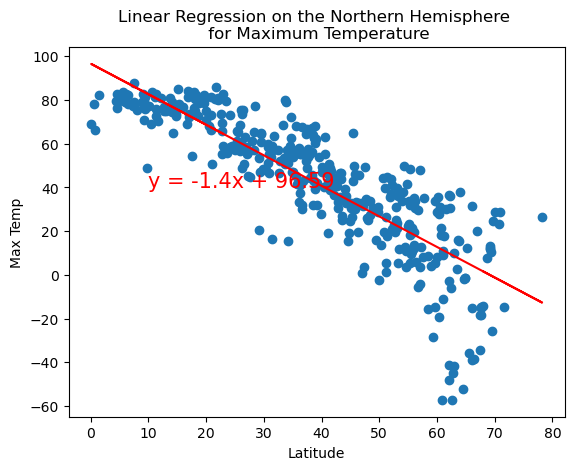

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(10,40))

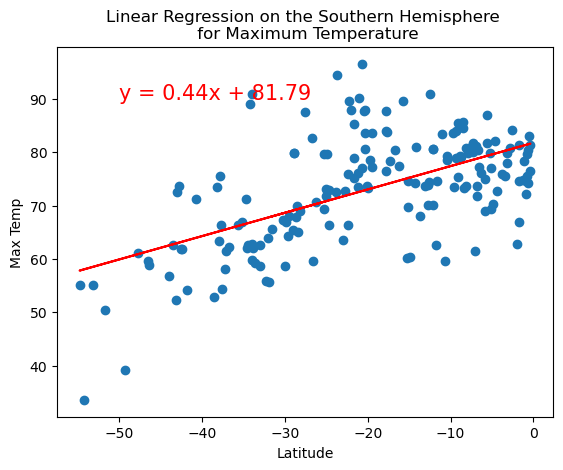

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(-50,90))

**Discussion about the linear relationship:** I see a strong linear realtionship

### Humidity vs. Latitude Linear Regression Plot

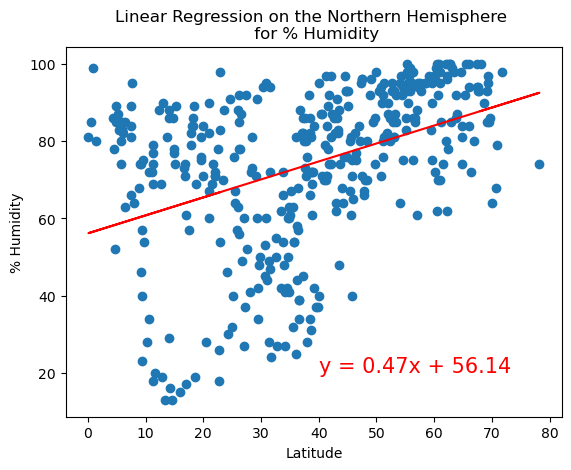

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity",(40,20))

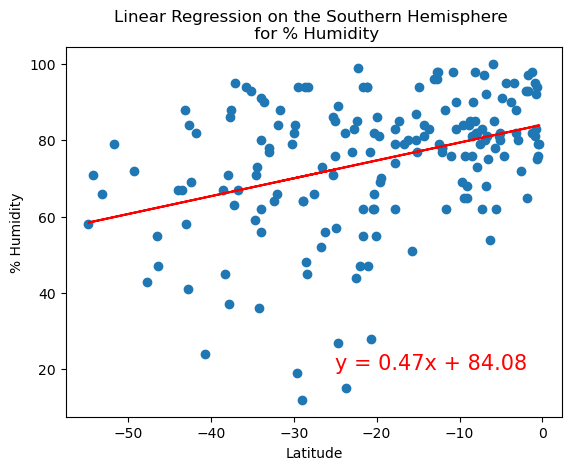

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity",(-25,20))


**Discussion about the linear relationship:** I see a strong linear realtionship

### Cloudiness vs. Latitude Linear Regression Plot

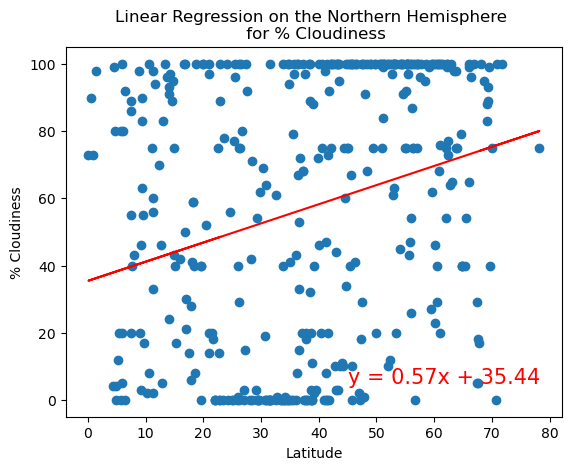

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(45,5))


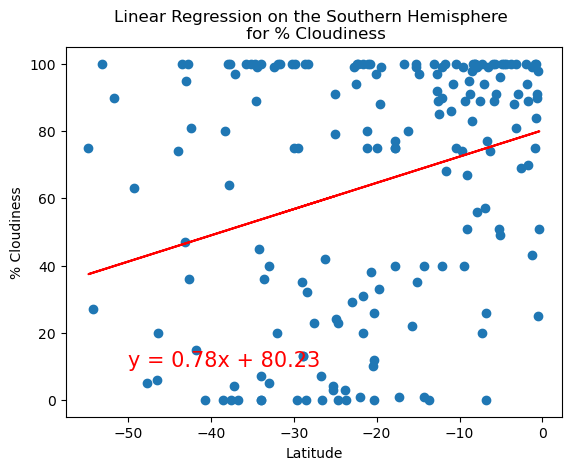

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness",(-50,10))

 **Discussion about the linear relationship:** I see a strong relationship

### Wind Speed vs. Latitude Linear Regression Plot

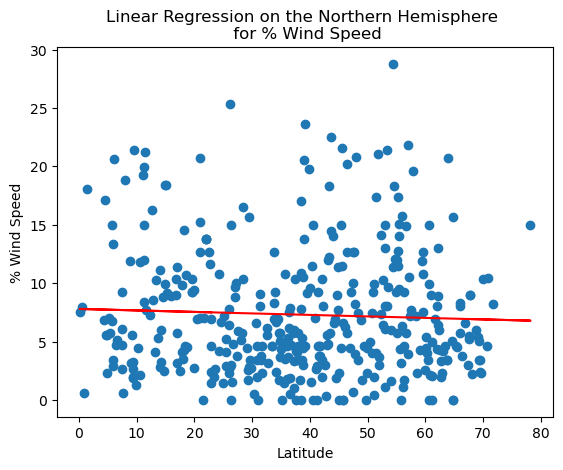

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(10,40))

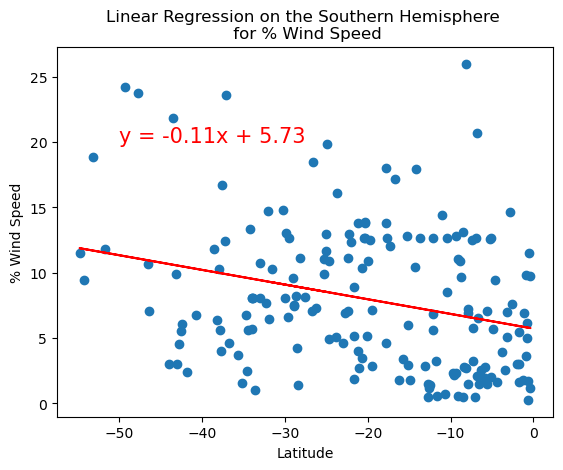

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values,
                       y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Wind Speed",
                       "% Wind Speed",(-50,20))

**Discussion about the linear relationship:** I see a weak relationship